# Akash patil
aakashgolu1008@gmail.com

This notebook presents a summary of a study that utilizes regression techniques to predict house prices.<br>
The dataset includes several features that represent different attributes of each house.<br>
 The primary objective of this project is to apply regression models to the dataset to predict the SalePrice feature.<br>
***

<h1 style="color: blue;" > ML Methods used: </h1>

The models that I used in this task:<br>

<b>1) Linear Regression,</b><br>
<b>2) Random Forest Regressor,</b><br>
<b style="border: 2px dotted blue;">3) Gradient Boosting Regressor,</b><br>
<b>4) Support Vector Regressor,</b><br>
<b>5) KNeighbours Regressor,</b><br>

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
df_train= pd.read_csv('train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We can inspect the types of feature columns using the following code:

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


### Description of checking Train data result:
Data contains 81 columns with 1460 samples.<br>
Data contains Object, int and float type vlues

### House Price Distribution
Now let us take a look at how the house prices are distributed

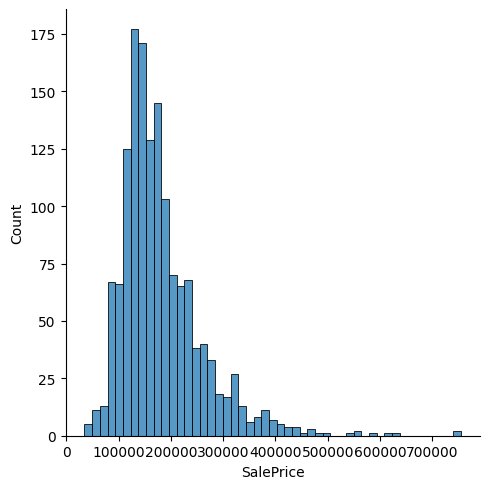

In [5]:
sns.displot(df_train['SalePrice']);

In [6]:
df_num = df_train.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


Now let us plot the distribution for all the numerical features.

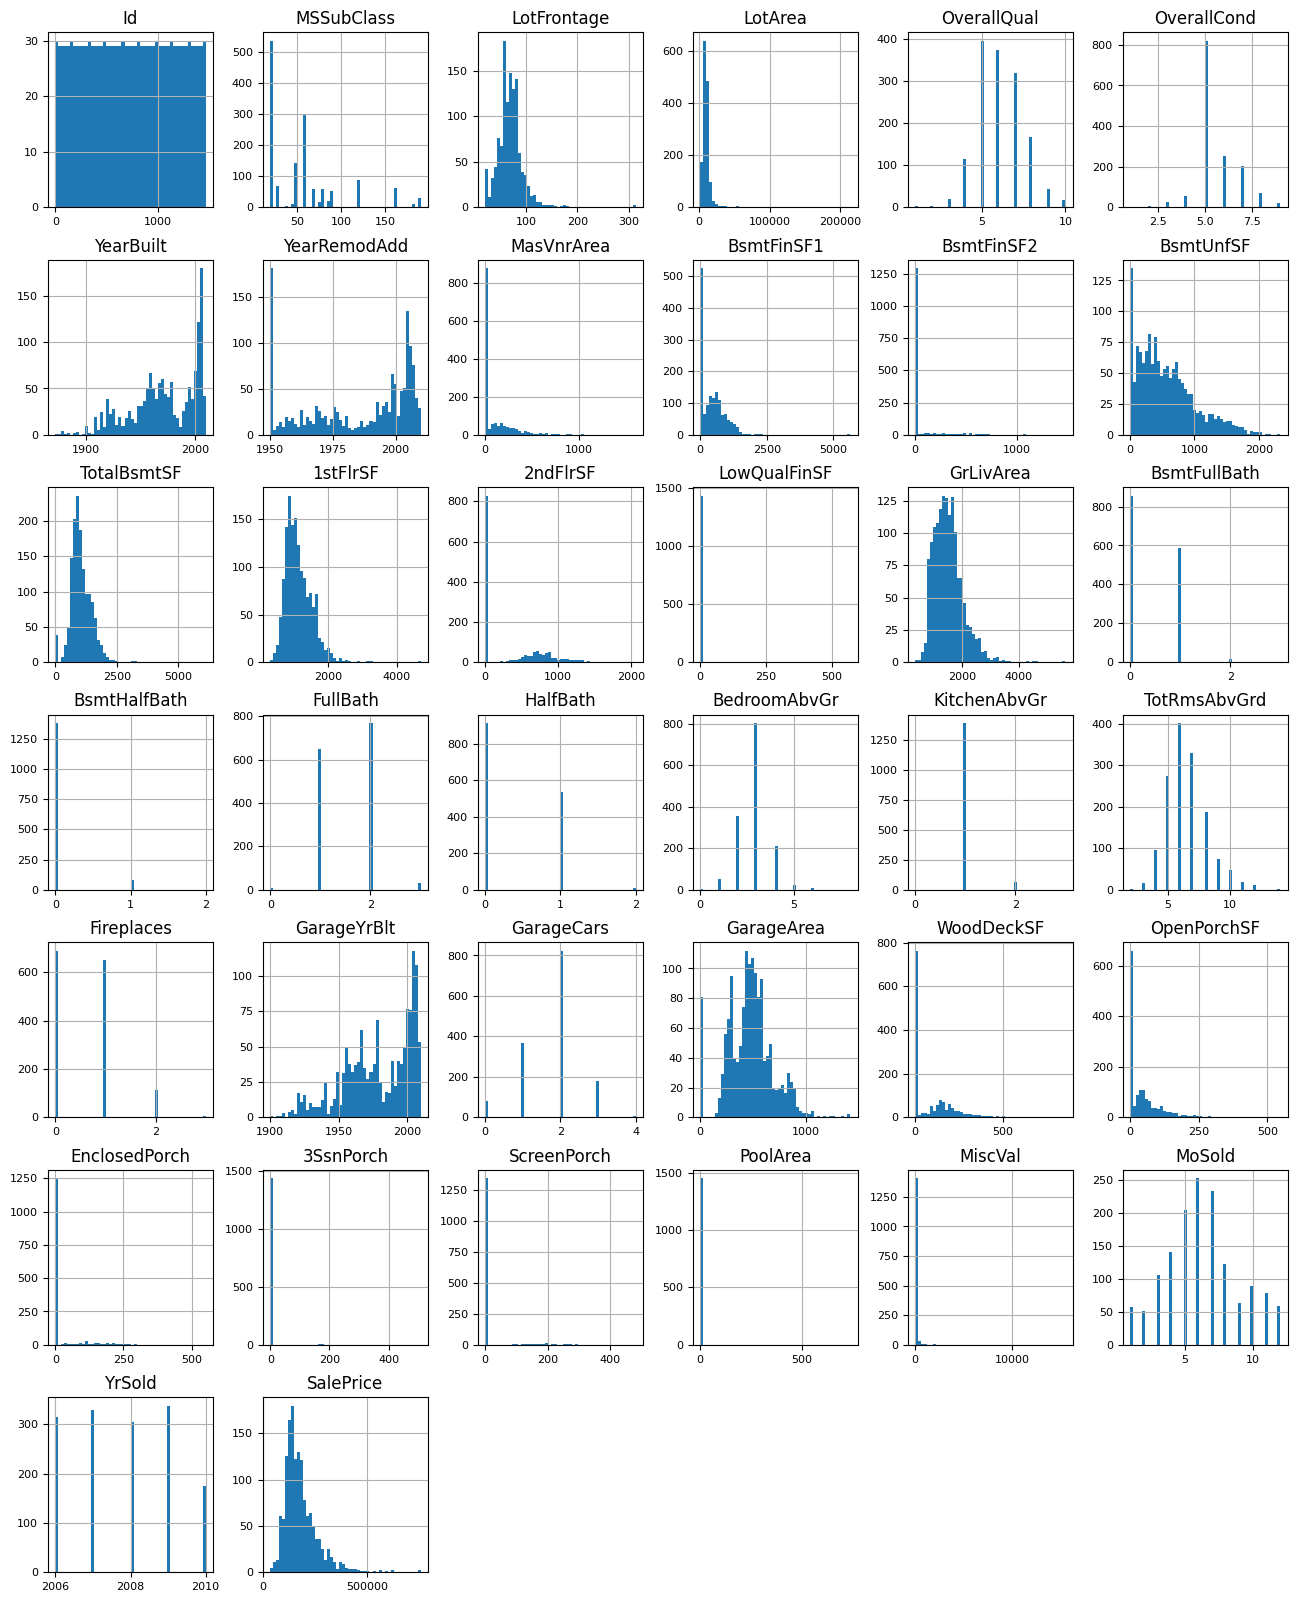

In [7]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

## Checking the Null values

In [8]:
print(df_train.isnull().sum().sort_values(ascending=False).head(25))

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
dtype: int64


Drop the columns that have more than 600 null values and also drop Id column.

In [9]:
train_data=df_train.drop('Id',axis=1)

In [11]:
train_data.shape

(1460, 80)

In [12]:
drop_col=[]
for i in train_data.columns:
    if train_data[i].isnull().sum()>600:
        drop_col.append(i)
train_data.drop(drop_col,axis=1,inplace=True)

In [13]:
train_data.shape

(1460, 75)

In [14]:
train_data.isnull().sum().sort_values(ascending=False).head(20)

LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtFinType2     38
BsmtExposure     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrArea        8
MasVnrType        8
Electrical        1
KitchenAbvGr      0
BedroomAbvGr      0
HalfBath          0
FullBath          0
BsmtHalfBath      0
BsmtFullBath      0
dtype: int64

### Fill the null values using fillna function.

In [15]:
for i in train_data.columns:
    if train_data[i].dtype == 'object':
        train_data[i].fillna(train_data[i].mode(),inplace=True)
    else:
        train_data[i].fillna(train_data[i].median(),inplace=True)


In [16]:
train_data.isnull().sum().sort_values(ascending=False).head(25)

GarageType       81
GarageCond       81
GarageFinish     81
GarageQual       81
BsmtFinType2     38
BsmtExposure     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrType        8
Electrical        1
OpenPorchSF       0
WoodDeckSF        0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
SaleCondition     0
HalfBath          0
SaleType          0
YrSold            0
MoSold            0
MiscVal           0
dtype: int64

The totall amount of null values: 0

---------------------The final train data set-------------------

In [17]:
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


it's important to convert object values (i.e. strings or categorical variables) into a numerical format that can be used as input to a machine learning algorithm. There are several methods for doing this:

One-hot encoding

Binary encoding

Hashing encoding

Label encoding: This method involves assigning a unique numerical value to each category in a categorical variable.

## Label Encoding

In [18]:
# lable encoder
from sklearn.preprocessing import LabelEncoder
for i in train_data.columns:
    if train_data[i].dtype == 'object':
        le=LabelEncoder()
        train_data[i]=le.fit_transform(train_data[i])

In [19]:
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,3,3,0,4,0,...,0,0,0,0,0,8,2007,8,4,175000
1456,20,3,85.0,13175,1,3,3,0,4,0,...,0,0,0,0,0,2,2010,8,4,210000
1457,70,3,66.0,9042,1,3,3,0,4,0,...,0,0,0,0,2500,5,2010,8,4,266500
1458,20,3,68.0,9717,1,3,3,0,4,0,...,112,0,0,0,0,4,2010,8,4,142125


Let's see the correlation between the features in the dataset:

In [20]:
train_data.corr()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,0.035900,-0.356718,-0.139781,-0.024969,0.119289,-0.002940,-0.022844,0.075910,-0.025672,...,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,0.012464,-0.024940,-0.084284
MSZoning,0.035900,1.000000,-0.105961,-0.034452,0.087654,0.061887,-0.017854,-0.001192,-0.009895,-0.022055,...,0.115509,0.000362,0.019089,-0.003128,0.009293,-0.031496,-0.020628,0.097437,0.009494,-0.166872
LotFrontage,-0.356718,-0.105961,1.000000,0.304522,-0.037349,-0.138877,-0.076080,-0.001027,-0.177821,0.065603,...,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,-0.031412,0.058857,0.334771
LotArea,-0.139781,-0.034452,0.304522,1.000000,-0.197131,-0.165315,-0.149083,0.010123,-0.121161,0.436868,...,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.012292,0.034169,0.263843
Street,-0.024969,0.087654,-0.037349,-0.197131,1.000000,-0.010224,0.115995,0.001682,0.013960,-0.179360,...,0.023082,0.007473,-0.033160,0.004413,-0.022733,0.003690,-0.025043,0.014339,0.006064,0.041036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,-0.013585,-0.031496,0.010451,0.001205,0.003690,-0.033455,-0.011599,-0.051552,0.018902,0.007072,...,-0.028887,0.029474,0.023217,-0.033737,-0.006495,1.000000,-0.145721,-0.047386,0.013320,0.046432
YrSold,-0.021407,-0.020628,0.006380,-0.014261,-0.025043,0.036449,0.020507,0.023353,-0.005992,-0.002305,...,-0.009916,0.018645,0.010694,-0.059689,0.004906,-0.145721,1.000000,-0.002327,0.003880,-0.028923
SaleType,0.012464,0.097437,-0.031412,0.012292,0.014339,-0.000911,-0.025754,-0.126770,0.014325,0.054858,...,-0.016731,-0.009034,0.004533,0.011009,0.015773,-0.047386,-0.002327,1.000000,0.184067,-0.054911
SaleCondition,-0.024940,0.009494,0.058857,0.034169,0.006064,-0.038118,0.033809,-0.089701,0.051579,-0.043095,...,-0.098388,0.004379,-0.020095,-0.067251,0.013027,0.013320,0.003880,0.184067,1.000000,0.213092


In [21]:
corr_matrix = train_data.corr().abs()

In [22]:
corr_matrix

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,0.035900,0.356718,0.139781,0.024969,0.119289,0.002940,0.022844,0.075910,0.025672,...,0.012037,0.043825,0.026030,0.008283,0.007683,0.013585,0.021407,0.012464,0.024940,0.084284
MSZoning,0.035900,1.000000,0.105961,0.034452,0.087654,0.061887,0.017854,0.001192,0.009895,0.022055,...,0.115509,0.000362,0.019089,0.003128,0.009293,0.031496,0.020628,0.097437,0.009494,0.166872
LotFrontage,0.356718,0.105961,1.000000,0.304522,0.037349,0.138877,0.076080,0.001027,0.177821,0.065603,...,0.010287,0.061945,0.037655,0.180819,0.000255,0.010451,0.006380,0.031412,0.058857,0.334771
LotArea,0.139781,0.034452,0.304522,1.000000,0.197131,0.165315,0.149083,0.010123,0.121161,0.436868,...,0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,0.014261,0.012292,0.034169,0.263843
Street,0.024969,0.087654,0.037349,0.197131,1.000000,0.010224,0.115995,0.001682,0.013960,0.179360,...,0.023082,0.007473,0.033160,0.004413,0.022733,0.003690,0.025043,0.014339,0.006064,0.041036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.013585,0.031496,0.010451,0.001205,0.003690,0.033455,0.011599,0.051552,0.018902,0.007072,...,0.028887,0.029474,0.023217,0.033737,0.006495,1.000000,0.145721,0.047386,0.013320,0.046432
YrSold,0.021407,0.020628,0.006380,0.014261,0.025043,0.036449,0.020507,0.023353,0.005992,0.002305,...,0.009916,0.018645,0.010694,0.059689,0.004906,0.145721,1.000000,0.002327,0.003880,0.028923
SaleType,0.012464,0.097437,0.031412,0.012292,0.014339,0.000911,0.025754,0.126770,0.014325,0.054858,...,0.016731,0.009034,0.004533,0.011009,0.015773,0.047386,0.002327,1.000000,0.184067,0.054911
SaleCondition,0.024940,0.009494,0.058857,0.034169,0.006064,0.038118,0.033809,0.089701,0.051579,0.043095,...,0.098388,0.004379,0.020095,0.067251,0.013027,0.013320,0.003880,0.184067,1.000000,0.213092


In [23]:
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [24]:
upper_tri 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,NaN,0.0359,0.356718,0.139781,0.024969,0.119289,0.002940,0.022844,0.075910,0.025672,...,0.012037,0.043825,0.026030,0.008283,0.007683,0.013585,0.021407,0.012464,0.024940,0.084284
MSZoning,NaN,NaN,0.105961,0.034452,0.087654,0.061887,0.017854,0.001192,0.009895,0.022055,...,0.115509,0.000362,0.019089,0.003128,0.009293,0.031496,0.020628,0.097437,0.009494,0.166872
LotFrontage,NaN,NaN,NaN,0.304522,0.037349,0.138877,0.076080,0.001027,0.177821,0.065603,...,0.010287,0.061945,0.037655,0.180819,0.000255,0.010451,0.006380,0.031412,0.058857,0.334771
LotArea,NaN,NaN,NaN,NaN,0.197131,0.165315,0.149083,0.010123,0.121161,0.436868,...,0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,0.014261,0.012292,0.034169,0.263843
Street,NaN,NaN,NaN,NaN,NaN,0.010224,0.115995,0.001682,0.013960,0.179360,...,0.023082,0.007473,0.033160,0.004413,0.022733,0.003690,0.025043,0.014339,0.006064,0.041036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.145721,0.047386,0.013320,0.046432
YrSold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002327,0.003880,0.028923
SaleType,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.184067,0.054911
SaleCondition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.213092


Drop the columns that have a correlation greater than 0.8

In [25]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]

In [26]:
to_drop

['Exterior2nd', '1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']

In [27]:
train_data.drop(to_drop,axis=1,inplace=True)

In [28]:
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,3,3,0,4,0,...,0,0,0,0,0,8,2007,8,4,175000
1456,20,3,85.0,13175,1,3,3,0,4,0,...,0,0,0,0,0,2,2010,8,4,210000
1457,70,3,66.0,9042,1,3,3,0,4,0,...,0,0,0,0,2500,5,2010,8,4,266500
1458,20,3,68.0,9717,1,3,3,0,4,0,...,112,0,0,0,0,4,2010,8,4,142125


Change the type of the  'MSSubClass', 'OverallQual', 'OverallCond', 'YrSold' and 'MoSold' because these are contains numerical values but these numbers are has meaning by their numeric values (Check the data_description.txt)

In [29]:
train_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
     

In [30]:
train_data['OverallQual']= train_data['OverallQual'].apply(str)
train_data['OverallCond']= train_data['OverallCond'].apply(str)
train_data['MSSubClass']= train_data['MSSubClass'].apply(str)
train_data['MoSold']= train_data['MoSold'].apply(str)
train_data['YrSold']= train_data['YrSold'].apply(str)

## Regression model

The models that I used in this task Linear Regression, Support Vector Regressor,Gradient Boosting Regressor, KNeighbours Regressor and Random Forest Regressor

### Define X and Y from dataset

In [31]:
# train model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

x=train_data.drop('SalePrice',axis=1)
y=train_data.SalePrice

#### Split data into train and test with the test size of 30%

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=1)

In [33]:
x_test.shape

(511, 70)

In [34]:
x_train.shape

(949, 70)

### LinearRegression

In [35]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
Pred=lr.predict(x_test)

In [94]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,Pred)
lr_rmse=np.sqrt(mse)
lr_rmse

32976.06420765

In [95]:
lr_r2=r2_score(y_test,Pred)
lr_r2

0.8410285212636293

### RandomForestRegressor

In [38]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
rf=RandomForestRegressor(n_estimators=300,random_state=1)
rf.fit(x_train,y_train)
Y_pred=rf.predict(x_test)

In [90]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,Y_pred)
rf_rmse=np.sqrt(mse)
rf_rmse

24712.128041068605

In [91]:
rf_r2=r2_score(y_test,Y_pred)
rf_r2

0.9107225319580967

### GradientBoostingRegressor

In [92]:
gb= GradientBoostingRegressor(n_estimators=300, learning_rate=0.2, random_state=42,max_depth=3)
gb.fit(x_train,y_train)
pred=gb.predict(x_test)
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,pred)
gb_rmse=np.sqrt(mse)
gb_rmse

22841.044567640423

In [93]:
gb_r2=r2_score(y_test,pred)
gb_r2

0.9237300439167317

### K Neighbors Regressor

In [43]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=4)
knn.fit(x_train,y_train)
PRED=knn.predict(x_test)

In [88]:
mse=mean_squared_error(y_test,PRED)
knn_rmse=np.sqrt(mse)
knn_rmse

53662.24722296022

In [89]:
knn_r2=r2_score(y_test,PRED)
knn_r2

0.579022111594289

### Support Vector Regressor

In [79]:
from sklearn.svm import SVR
model = SVR(kernel='linear')
model.fit(x_train,y_train)
Y_PRED=model.predict(x_test)

In [84]:
mse=mean_squared_error(y_test,Y_PRED)
SVR_rmse=np.sqrt(mse)
SVR_rmse

36732.707863441974

In [87]:
SVR_r2=r2_score(y_test,Y_PRED)
SVR_r2

0.8027452529086925

In [96]:
models=['Linear Regression', 'Support Vector Regressor','Gradient Boosting Regressor' ,'KNeighbours Regressor' ,'Random Forest Regressor']
rmse= [lr_rmse,SVR_rmse,gb_rmse,knn_rmse,rf_rmse]
r2_score=[lr_r2,SVR_r2,gb_r2,knn_r2,rf_r2]

In [99]:
model_score=pd.DataFrame({'Regression_models':models,"rmse_score": rmse, "r2_score": r2_score})

In [102]:
result=model_score.sort_values('rmse_score',ignore_index=True)
result

,Regression_models,rmse_score,r2_score
0,Gradient Boosting Regressor,22841.044568,0.923730
1,Random Forest Regressor,24712.128041,0.910723
2,Linear Regression,32976.064208,0.841029
3,Support Vector Regressor,36732.707863,0.802745
4,KNeighbours Regressor,53662.247223,0.579022


##### The best regressor model for house price prediction is Gradient Boosting Regressor

Now same Steps for the test Dataset and prediction using Gradient Boosting Regressor

### for the test dataset

In [103]:
df_test=pd.read_csv('test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [104]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [105]:
df_test.isnull().sum().sort_values(ascending=False).head(25)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
BsmtFinSF2         1
dtype: int64

In [106]:
test_data=df_test.drop('Id',axis=1)

In [107]:
drop_col= []
for i in test_data.columns:
    if df_test[i].isnull().sum()>600:
        drop_col.append(i)
test_data.drop(drop_col,axis=1,inplace=True)

In [108]:
test_data.shape

(1459, 74)

In [109]:
test_data.isnull().sum().sort_values(ascending=False).head(30)

LotFrontage     227
GarageCond       78
GarageYrBlt      78
GarageFinish     78
GarageQual       78
GarageType       76
BsmtCond         45
BsmtExposure     44
BsmtQual         44
BsmtFinType1     42
BsmtFinType2     42
MasVnrType       16
MasVnrArea       15
MSZoning          4
Functional        2
BsmtHalfBath      2
Utilities         2
BsmtFullBath      2
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
KitchenQual       1
Exterior2nd       1
Exterior1st       1
GarageArea        1
SaleType          1
GarageCars        1
MoSold            0
FullBath          0
dtype: int64

In [110]:
for i in test_data.columns:
    if test_data[i].dtype == 'object':
        test_data[i].fillna(test_data[i].mode()[0], inplace=True)
    elif test_data[i].dtype == 'float64':
        test_data[i].fillna(test_data[i].median(), inplace=True)
    elif test_data[i].dtype == 'int64':
        test_data[i].fillna(test_data[i].median(), inplace=True)

In [111]:
test_data.isnull().sum().sort_values(ascending=False).head(20)

MSSubClass      0
GarageType      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
Electrical      0
CentralAir      0
Fireplaces      0
GarageYrBlt     0
MSZoning        0
dtype: int64

In [ ]:
# null_cols=test_data.isnull().any()

In [ ]:
#null_values=null_cols[null_cols== True].index.tolist()

In [ ]:
#null_rows = test_data[test_data.isnull().any(axis=1)]

In [ ]:
#null_rows[null_values]

In [ ]:
#for col in null_rows[null_values].columns:
#    print(null_rows[null_values][col].value_counts(dropna=False))

In [ ]:
#test_data['SaleType'].fillna('Oth',inplace=True)

In [ ]:
#test_data['GarageCond'].fillna('TA',inplace=True)

In [ ]:
# test_data['GarageQual'].fillna('TA',inplace=True)
# test_data['GarageFinish'].fillna('Unf',inplace=True)
# test_data['GarageType'].fillna('Attchd',inplace=True)
# test_data['Functional'].fillna('Min2',inplace=True)
# test_data['KitchenQual'].fillna('Gd',inplace=True)

In [ ]:
# test_data['BsmtFinType2'].fillna('Unf',inplace=True)
# test_data['BsmtFinType1'].fillna('Unf',inplace=True)
# test_data['BsmtExposure'].fillna('No',inplace=True)
# test_data['BsmtCond'].fillna('TA',inplace=True)
# test_data['BsmtQual'].fillna('TA',inplace=True)

In [ ]:
# test_data['MasVnrType'].fillna('None',inplace=True)
# test_data['Exterior2nd'].fillna('VinylSd',inplace=True)
# test_data['Exterior1st'].fillna('VinylSd',inplace=True)
# test_data['Utilities'].fillna('AllPub',inplace=True)
# test_data['MSZoning'].fillna('RL',inplace=True)

In [ ]:
# test_data.isnull().sum().sort_values(ascending=False).head(20)

In [112]:
# lable encoder
from sklearn.preprocessing import LabelEncoder
for i in test_data.columns:
    if test_data[i].dtype == 'object':
        le=LabelEncoder()
        test_data[i]=le.fit_transform(test_data[i])

In [113]:
test_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.0,11622,1,3,3,0,4,0,...,0,0,0,120,0,0,6,2010,8,4
1,20,3,81.0,14267,1,0,3,0,0,0,...,36,0,0,0,0,12500,6,2010,8,4
2,60,3,74.0,13830,1,0,3,0,4,0,...,34,0,0,0,0,0,3,2010,8,4
3,60,3,78.0,9978,1,0,3,0,4,0,...,36,0,0,0,0,0,6,2010,8,4
4,120,3,43.0,5005,1,0,1,0,4,0,...,82,0,0,144,0,0,1,2010,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,4,21.0,1936,1,3,3,0,4,0,...,0,0,0,0,0,0,6,2006,8,4
1455,160,4,21.0,1894,1,3,3,0,4,0,...,24,0,0,0,0,0,4,2006,8,0
1456,20,3,160.0,20000,1,3,3,0,4,0,...,0,0,0,0,0,0,9,2006,8,0
1457,85,3,62.0,10441,1,3,3,0,4,0,...,32,0,0,0,0,700,7,2006,8,4


In [ ]:
# corr_matrix = test_data.corr().abs()
# corr_matrix

In [ ]:
# upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# upper_tri

In [114]:
# to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.78)]
# to_drop
to_drop=['Exterior2nd', '1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']

In [115]:
test_data.drop(to_drop,axis=1,inplace=True)

In [116]:
test_data['OverallQual']= test_data['OverallQual'].apply(str)
test_data['OverallCond']= test_data['OverallCond'].apply(str)
test_data['MSSubClass']= test_data['MSSubClass'].apply(str)
test_data['MoSold']= test_data['MoSold'].apply(str)
test_data['YrSold']= test_data['YrSold'].apply(str)

In [117]:
test_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.0,11622,1,3,3,0,4,0,...,0,0,0,120,0,0,6,2010,8,4
1,20,3,81.0,14267,1,0,3,0,0,0,...,36,0,0,0,0,12500,6,2010,8,4
2,60,3,74.0,13830,1,0,3,0,4,0,...,34,0,0,0,0,0,3,2010,8,4
3,60,3,78.0,9978,1,0,3,0,4,0,...,36,0,0,0,0,0,6,2010,8,4
4,120,3,43.0,5005,1,0,1,0,4,0,...,82,0,0,144,0,0,1,2010,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,4,21.0,1936,1,3,3,0,4,0,...,0,0,0,0,0,0,6,2006,8,4
1455,160,4,21.0,1894,1,3,3,0,4,0,...,24,0,0,0,0,0,4,2006,8,0
1456,20,3,160.0,20000,1,3,3,0,4,0,...,0,0,0,0,0,0,9,2006,8,0
1457,85,3,62.0,10441,1,3,3,0,4,0,...,32,0,0,0,0,700,7,2006,8,4


#### final prediction for test dataset 

In [120]:
test_pred=gb.predict(test_data)

In [125]:
test_pred.shape

(1459,)

In [127]:
Final_pred=pd.DataFrame({'Id':df_test.Id, 'SalePrice':test_pred})

In [128]:
Final_pred

,Id,SalePrice
0,1461,113194.177537
1,1462,160918.805250
2,1463,186872.587413
3,1464,192999.609799
4,1465,186165.813705
...,...,...
1454,2915,89273.026974
1455,2916,73848.237421
1456,2917,165055.628331
1457,2918,126256.921158


In [129]:
Final_pred.to_csv('Final.csv', index = False)

## Conclusion

Based on my regression models the Gradient Boosting Regressor performed better result than the other regression model <br>
with <b> 0.9237 r2 score</b> and <b> 22841.0445 RMSE</b>